In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import multiprocessing
from functools import partial

* *cv2.medianBlur(image, kernel_size)* : Median Filter
* *minimum_filter(image, size=kernel_size)* : Minimum Filter
* *maximum_filter(image, size=kernel_size)* : Maximum Filter

In [3]:
def median_filter(image, kernel_size):
    pad_size = kernel_size // 2 #because N-1 pixels split on each side
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

    # Create an empty output image
    filtered_image = np.zeros_like(image)

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            # Extract the neighborhood
            neighborhood = padded_image[y:y + kernel_size, x:x + kernel_size] # y: starting index ; y+kernel_size: end index
            filtered_image[y, x] = np.median(neighborhood)

    return filtered_image

In [4]:
def min_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode = "constant", constant_values=0)

    filtered_image = np.zeros_like(image)

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            neighborhood = padded_image[y:y + kernel_size, x:x + kernel_size]
            filtered_image[y, x] = np.min(neighborhood)

    return filtered_image

In [5]:
def max_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode = "constant", constant_values=0)

    filtered_image = np.zeros_like(image)

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            neighborhood = padded_image[y:y + kernel_size, x:x + kernel_size]
            filtered_image[y, x] = np.max(neighborhood)

    return filtered_image

# Processing

Image 1 - Car

In [11]:
image_path = r"/content/car.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [12]:
height, width = image.shape
height, width

(4160, 6240)

In [13]:
scale_factor = 0.25
new_dimensions = (int(width * scale_factor), int(height * scale_factor))
downsampled_image = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_AREA)

In [14]:
height, width = downsampled_image.shape
height, width

(1040, 1560)

In [15]:
median = median_filter(image, 5)

In [16]:
max = max_filter(image, 5)

In [ ]:
min = min_filter(image, 5)

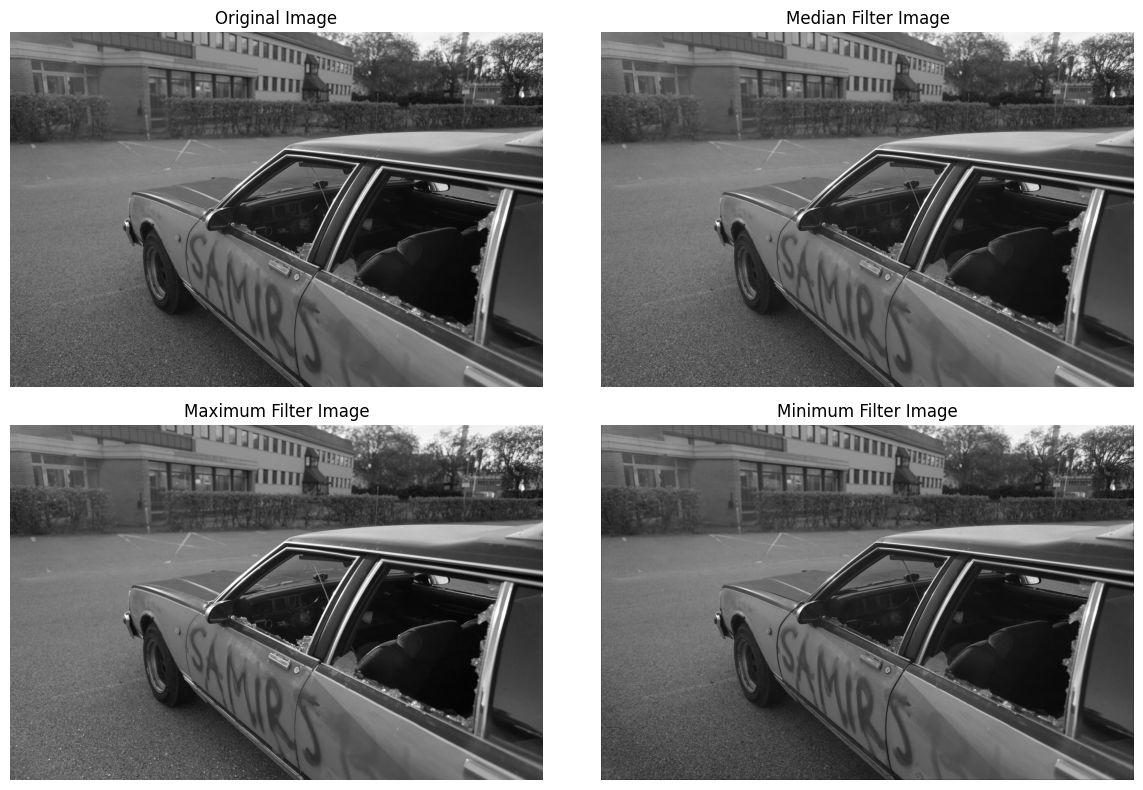

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(median, cmap='gray')
axes[0, 1].set_title('Median Filter Image')
axes[0, 1].axis('off')

axes[1, 0].imshow(max, cmap='gray')
axes[1, 0].set_title('Maximum Filter Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(min, cmap='gray')
axes[1, 1].set_title('Minimum Filter Image')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

Image 2 - Noisy Puppy

In [20]:
image_path = r"/content/noisy puppy.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [21]:
height, width = image.shape
height, width

(300, 332)

In [22]:
median = median_filter(image, 5)
max = max_filter(image, 5)
min = min_filter(image, 5)

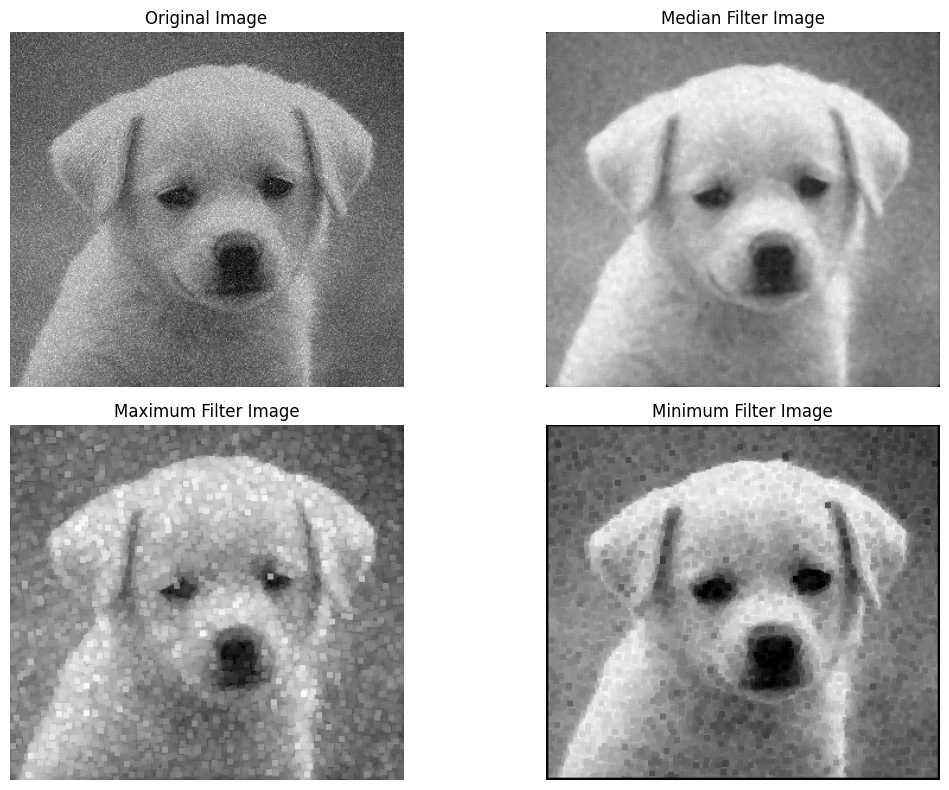

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(median, cmap='gray')
axes[0, 1].set_title('Median Filter Image')
axes[0, 1].axis('off')

axes[1, 0].imshow(max, cmap='gray')
axes[1, 0].set_title('Maximum Filter Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(min, cmap='gray')
axes[1, 1].set_title('Minimum Filter Image')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()